### Viene usata la libreria scikit-learn per verificare i risultati ottenuti in lin_reg.ipynb

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

Funzioni di stampa

In [32]:
def printLinRegFunction(theta, data):
    print("########## MODELLO ##########")
    print('\nLGND: ' + data.columns.values[len(theta)] + " = Theta * feature")
    print('\n' + data.columns.values[len(theta)] + " = ")
    for i in range(len(theta)):
        print('\t' + str(round(theta[i], 5)) + ' * ' + data.columns.values[i] + ' +')


def printEvaluationResults(r2, mae, rmse):
    print('\n########## RISULTATI VALUTAZIONE ##########')
    print('\nR2 = ' + str(round(r2, 5)))
    print('Mean Absolute Error = ' + str(round(mae, 5)))
    print('Root Mean Squared Error = ' + str(round(rmse, 5)))

In [33]:
dataset = pd.read_csv('cars_numeric.csv')

x = dataset.drop('price', axis=1).values
y = dataset['price'].values

linear_regression = LinearRegression()



x_training, x_test, y_training, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

linear_regression.fit(x_training, y_training)

prediction = linear_regression.predict(x_test)

r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)

In [34]:
print("(scikit-learn) - VALUTAZIONE DEL MODELLO TRAMITE SPLIT 70/30")
printLinRegFunction(linear_regression.coef_, dataset)
printEvaluationResults(r2, mae, rmse)

(scikit-learn) - VALUTAZIONE DEL MODELLO TRAMITE SPLIT 70/30
########## MODELLO ##########

LGND: price = Theta * feature

price = 
	-156.48848 * symboling +
	-389.70055 * normalized-losses +
	-1148.38268 * make +
	2346.44335 * fuel-type +
	1235.31326 * aspiration +
	-366.98634 * num-of-doors +
	-404.41418 * body-style +
	-584.51593 * drive-wheels +
	-0.0 * engine-location +
	469.06136 * wheel-base +
	1683.28608 * length +
	-74.37712 * width +
	165.5025 * height +
	1080.78942 * curb-weight +
	192.80566 * engine-type +
	1510.1367 * num-of-cylinders +
	3386.3421 * engine-size +
	-1018.61062 * fuel-system +
	-503.942 * bore +
	-883.74193 * stroke +
	-1440.39604 * compression-ratio +
	41.09742 * horsepower +
	712.52129 * peak-rpm +
	-828.72485 * city-mpg +
	1156.23392 * highway-mpg +

########## RISULTATI VALUTAZIONE ##########

R2 = 0.75362
Mean Absolute Error = 2918.68401
Root Mean Squared Error = 4594.87981


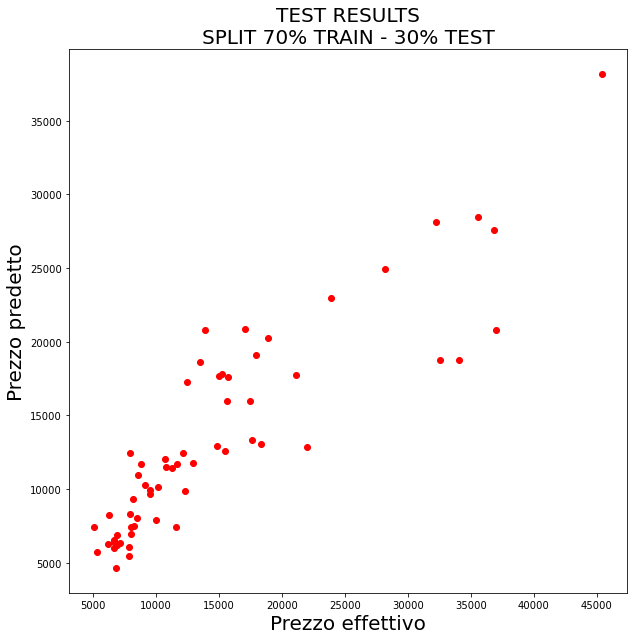

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(x = y_test, y = prediction, c='red') 
plt.title("TEST RESULTS\nSPLIT 70% TRAIN - 30% TEST", fontsize=20)
plt.xlabel("Prezzo effettivo", fontsize=20)
plt.ylabel("Prezzo predetto", fontsize=20)
plt.show()

### Cross Validazione

In [37]:
r2_array = cross_val_score(linear_regression, x, y, cv = 10, scoring = 'r2')
mae_array = cross_val_score(linear_regression, x, y, cv = 10, scoring = 'neg_mean_absolute_error')
rmse_array = cross_val_score(linear_regression, x, y, cv = 10, scoring = 'neg_root_mean_squared_error')

printEvaluationResults(np.mean(np.abs(r2_array)), -(np.mean(mae_array)), -(np.mean(rmse_array)))


########## RISULTATI VALUTAZIONE ##########

R2 = 0.69439
Mean Absolute Error = 2903.06933
Root Mean Squared Error = 3879.80389
